Empleando los datos del archivo './src/crypto_currency'.

- Cargue los datos en una base de datos apropiada.
- Lea mediante pandas las bases cargadas
- Emplee un metodo de concatenación para unificar la información.(debe considerar que se añadirá una columna adicional que especifique el tipo de moneda)
- Genere un agrupamiento de información a manera de obtener un resumen de los datos.
- Almacene dichos datos en un reporte excel.
- Apoyandose del ejercicio 2. Cree una imagen que sea guarda en el archivo excel
- Emplee un método de envio de correos



In [1]:
import pandas as pd

In [4]:
## Leyendo datos de tipo "excel"  
%pip install openpyxl
path_ = "./src/cripto_currency.xlsx"
df = pd.read_excel(path_, sheet_name=None)

df.keys()


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


dict_keys(['BTC-USD', 'DOGE-USD', 'USDT-USD'])

In [8]:
import pandas as pd
import sqlite3

# Nombre del archivo Excel
excel_file_path = './src/cripto_currency.xlsx'

# Nombre de las hojas en el archivo Excel
sheet_names = ['BTC-USD', 'DOGE-USD', 'USDT-USD']

# Conectar a la base de datos (en este caso, SQLite)
conn = sqlite3.connect('cripto_prices.db')

# Lista para almacenar los DataFrames de cada hoja con la columna 'TipoMoneda' agregada
dfs_with_currency = []

# Iterar sobre las hojas y cargarlas en la base de datos
for sheet_name in sheet_names:
    # Leer la hoja como un DataFrame
    df = pd.read_excel(excel_file_path, sheet_name)

    # Agregar la columna 'TipoMoneda' con el nombre de la hoja
    df['TipoMoneda'] = sheet_name

    # Guardar el DataFrame en la lista
    dfs_with_currency.append(df)

# Concatenar los DataFrames en uno solo
concatenated_df = pd.concat(dfs_with_currency, ignore_index=True)

# Escribir el DataFrame concatenado en la base de datos
concatenated_df.to_sql('datos_concatenados', conn, index=False, if_exists='replace')

#



1098

In [16]:

concatenated_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TipoMoneda
0,2022-10-19,19335.027344,19348.416016,19127.687500,19139.535156,19139.535156,22425387184,BTC-USD
1,2022-10-20,19138.085938,19315.199219,18971.458984,19053.740234,19053.740234,24493974420,BTC-USD
2,2022-10-21,19053.203125,19237.384766,18770.970703,19172.468750,19172.468750,32459287866,BTC-USD
3,2022-10-22,19172.380859,19248.068359,19132.244141,19208.189453,19208.189453,16104440957,BTC-USD
4,2022-10-23,19207.734375,19646.652344,19124.197266,19567.007813,19567.007813,22128794335,BTC-USD


In [13]:
concatenated_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1098,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1.098000e+03
mean,2023-04-19 12:00:00,8217.984645,8343.044734,8104.103541,8226.310154,8226.310154,1.689082e+10
min,2022-10-19 00:00:00,0.057897,0.058495,0.057418,0.057897,0.057897,9.248368e+07
25%,2023-01-18 00:00:00,0.083455,0.086125,0.080761,0.083559,0.083559,5.667462e+08
50%,2023-04-19 12:00:00,1.000096,1.000486,0.999843,1.000101,1.000101,1.484558e+10
75%,2023-07-20 00:00:00,20964.268555,21357.000488,20596.860840,21059.169434,21059.169434,2.514337e+10
max,2023-10-19 00:00:00,31474.720703,31814.515625,30659.355469,31476.048828,31476.048828,1.627349e+11
std,NaN,11923.492150,12104.281665,11759.476105,11934.593132,11934.593132,1.733830e+10


In [19]:
concatenated_df.groupby(['TipoMoneda']).Low.agg([len, min, max])

/tmp/ipykernel_66039/3151816666.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  concatenated_df.groupby(['TipoMoneda']).Low.agg([len, min, max])
/tmp/ipykernel_66039/3151816666.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  concatenated_df.groupby(['TipoMoneda']).Low.agg([len, min, max])


,len,min,max
TipoMoneda,,,
BTC-USD,366,15599.046875,30659.355469
DOGE-USD,366,0.057418,0.125177
USDT-USD,366,0.981525,1.005939


In [21]:
# Almacenar el resumen en un archivo Excel
summary_df = concatenated_df.groupby(['TipoMoneda']).Low.agg([len, min, max])
summary_df.to_excel('./output/resumen.xlsx', index=False)



/tmp/ipykernel_66039/3077514288.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  summary_df = concatenated_df.groupby(['TipoMoneda']).Low.agg([len, min, max])
/tmp/ipykernel_66039/3077514288.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  summary_df = concatenated_df.groupby(['TipoMoneda']).Low.agg([len, min, max])


<Axes: ylabel='TipoMoneda'>

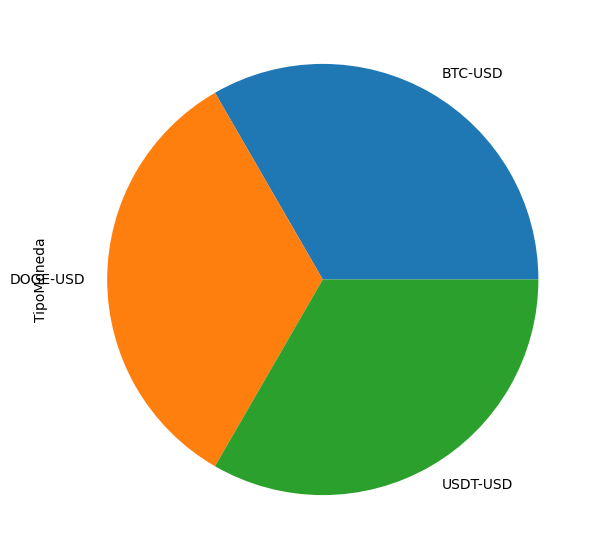

In [25]:
# - Hires by technology (pie chart)
tp = concatenated_df.groupby('TipoMoneda')['TipoMoneda'].count()
tp.plot.pie(figsize=(11, 7))

In [38]:
condition = (concatenated_df['Close'] >concatenated_df['Open'])

df_filter = concatenated_df[condition]

# ordenamiento
df_order = df_filter.sort_values(['Close', 'Open'], ascending=[False, False])


df_order.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TipoMoneda
267,2023-07-13,30387.488281,31814.515625,30268.351563,31476.048828,31476.048828,23686079548,BTC-USD
257,2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873,BTC-USD
247,2023-06-23,29896.382813,31389.539063,29845.214844,30695.468750,30695.468750,24115570085,BTC-USD
251,2023-06-27,30274.320313,31006.787109,30236.650391,30688.164063,30688.164063,16428827944,BTC-USD
265,2023-07-11,30417.632813,30788.314453,30358.097656,30620.951172,30620.951172,12151839152,BTC-USD


<Axes: xlabel='TipoMoneda'>

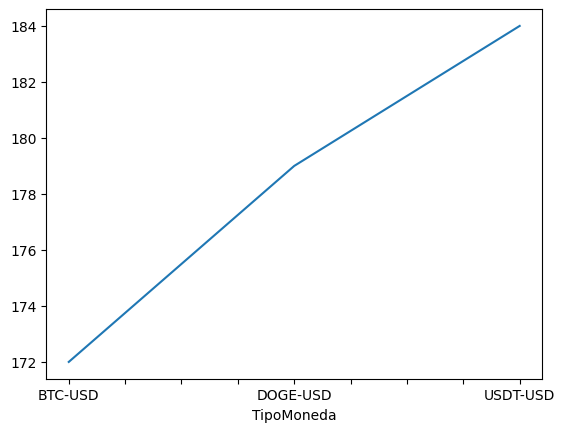

In [45]:
senority_group = df_filter.groupby('TipoMoneda')['Date'].count()
senority_group.plot.line()

In [ ]:
# Configuración del servidor y credenciales
import os 

smtp_server = 'smtp.gmail.com'  # Cambia esto al servidor SMTP que estés utilizando
smtp_port = 587  # Cambia esto al puerto adecuado
sender_email = 'scastillo.ngr@gmail.com'
sender_password = '------'

# Detalles del correo electrónico
receiver_email = 'sandra.libra96@gmail.com'
subject='Reporte Cripto'

# Crear el objeto MIMEMultipart
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = receiver_email
msg['Subject'] = subject

# Adjuntar archivo
file_path = './resumen.xlsx'  # Cambia la ruta al archivo que quieras adjuntar
with open(file_path, 'rb') as file:
    attachment = MIMEApplication(file.read(), _subtype="xlsx")
    attachment.add_header('Content-Disposition', 'attachment', filename=file_path)
    msg.attach(attachment)
    
# Iniciar la conexión con el servidor SMTP
with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()  # Iniciar el modo seguro
    server.login(sender_email, sender_password)
    server.sendmail(sender_email, receiver_email, msg.as_string())

print('Correo enviado exitosamente')